In [1]:
# This data analysis aims to answer a fundamental question in Moder Machine learning Classification. : Given our data, how likely is a new crime committed can be categorized as Theft? The data contains a random sample of all reported incidents of crime in the City of Chicago between 2010 and 2017. our variables of interest are "Crime Type: The primary description of the IUCR(The Illinois Uniform Crime Reporting code) code," "District: Indicates the police district where the incident occurred," "ward: The ward (City Council district) where the incident occurred," and "Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas."  The analysis's primary goal is to make accurate predictions on the test data, the underlying truth.   

In [2]:
# lets import the package

import numpy as np
import pandas as pd
import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics
from IPython.display import Image
#from pydotplus import graph_from_dot_data




In [3]:
#. Lets import our data and obtain the first five rows.
df = pd.read_csv("/Users/jephteestiverne/Desktop/Fall2020/ECON_622_01/database/chicago_crimes_data_2010_2017.csv")
#print(df)
df.head(6)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/12 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012,train
1,720647,8417624,HT650924,12/28/11 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011,train
2,32037,7348669,HS150223,2/3/10 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010,train
3,532182,8124889,HT358665,6/21/11 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22.0,19.0,75.0,3,41.692042,-87.665924,2011,train
4,2420587,11164022,JA530938,11/30/17 11:45,031XX W DIVERSEY AVE,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1411,14.0,35.0,21.0,3,41.932040,-87.705287,2017,test
5,1245448,9301182,HW445774,8/5/13 12:00,038XX N SHEFFIELD AVE,810,THEFT,OVER $500,OTHER,False,False,1923,19.0,44.0,6.0,6,41.951940,-87.654466,2013,train


In [4]:
# Let's create a binary variable for the emphasis on theft. 
df['Theft_Binary'] = np.where(df['Primary_Type'] == 'THEFT',1,0)
# confirming our new column binary variable
df.head(6)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,...,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test,Theft_Binary
0,1027327,8899599,HV573490,11/22/12 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,...,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012,train,0
1,720647,8417624,HT650924,12/28/11 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,...,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011,train,0
2,32037,7348669,HS150223,2/3/10 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010,train,0
3,532182,8124889,HT358665,6/21/11 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,...,2212,22.0,19.0,75.0,3,41.692042,-87.665924,2011,train,0
4,2420587,11164022,JA530938,11/30/17 11:45,031XX W DIVERSEY AVE,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,...,1411,14.0,35.0,21.0,3,41.932040,-87.705287,2017,test,0
5,1245448,9301182,HW445774,8/5/13 12:00,038XX N SHEFFIELD AVE,810,THEFT,OVER $500,OTHER,False,...,1923,19.0,44.0,6.0,6,41.951940,-87.654466,2013,train,1


In [5]:
x = len(df[df['Theft_Binary'] == 1])
x# total theft in our sample crimes  = 108905
y = len(df[df['Theft_Binary'] == 0])
y# total NOT theft in our sample crimes  = 379365
z = (round(float(len(df[df['Theft_Binary'] == 1])) / len(df) * 100), 3)# % people left = 24.0%
z# percentage of crimes that are theft related 

(22, 3)

In [6]:
#Using simple math preference
Percent  = (x/(x + y)) * 100
round(Percent)

22

In [7]:
df.apply(lambda x: sum(x.isnull()), axis=0)
# Checking data frame for missing values, we can observe a large number of missing data in the meridian  

Unnamed: 0                 0
ID                         0
Case Number                1
Date                       0
Block                      0
IUCR                       0
Primary_Type               0
Description                0
Location Description     590
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                       9
Community Area            87
FBI Code                   0
Latitude                8838
Longitude               8838
Year                       0
train_or_test              0
Theft_Binary               0
dtype: int64

In [8]:
# Let's now obtain five percent of our sample data and do a Pairwise Plots. Note that this is computationally expensive.
df_sample = df.sample(frac=0.05)
# Pairwise plots
#pplot = sns.pairplot(df_sample, hue="Theft_Binary")


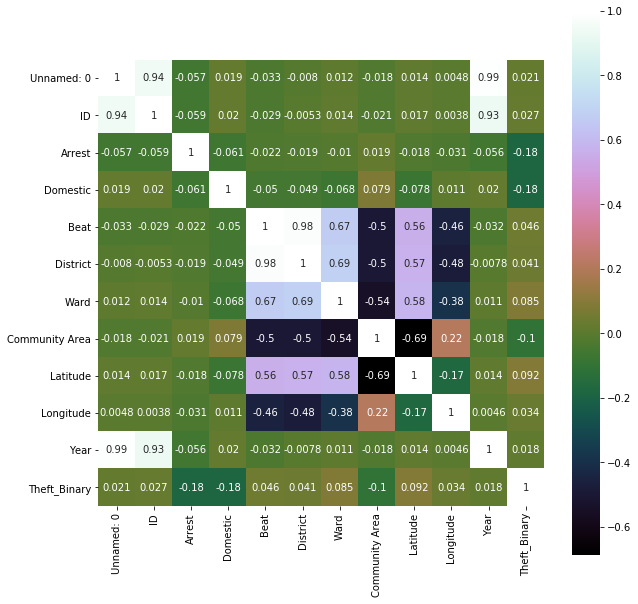

In [9]:
# We can also use a Correlation heatmap. The importance of the aesthetics of a heatmap cannot be overlooked; after all, the main purpose of creating a graphic representation of data is for better understanding. This article will walk you through several ways that a correlation heatmap can be tweaked or customized to improve its readability, which is essential to effectively present your data.
# Reference : https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
# Notice how our binary variable has a mostly positive correlation.  

In [10]:
#Let's now generate a Crime Variable and then use it to make our dummy variable. 
Crime = np.random.choice(['Theft','Theft_Not'], 4)
df1 = pd.DataFrame(Crime, columns=['Crime'])
# Generate a One hot encode Crime
dummies = pd.get_dummies(df1['Crime'])
# Joining our dummies to 'df1'
df1 = df1.join(dummies)
print (df1)

       Crime  Theft  Theft_Not
0  Theft_Not      0          1
1  Theft_Not      0          1
2      Theft      1          0
3      Theft      1          0


In [11]:
# Let's now obtain our column names in the form of a list vector.  
df.columns.tolist()

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary_Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'Latitude',
 'Longitude',
 'Year',
 'train_or_test',
 'Theft_Binary']

In [12]:
# Drop unnecessary columns to avoid the dummy variable trap (Skip)
df2 = df.drop(['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'Latitude',
 'Longitude',
 'Year',
 'train_or_test'], axis=1)

# Lets drop the unnecessary columns to avoid the dummy variable trap
df = df.drop(['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR','Primary_Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'FBI Code',
 'Latitude',
 'Longitude',
 'Year',
 'train_or_test'], axis=1)

In [13]:
df2.head(6)

,Primary_Type,Theft_Binary
0,CRIMINAL DAMAGE,0
1,WEAPONS VIOLATION,0
2,BATTERY,0
3,ROBBERY,0
4,ROBBERY,0
5,THEFT,1


In [14]:
df.head(6)

,District,Ward,Community Area,Theft_Binary
0,25.0,36.0,18.0,0
1,5.0,34.0,53.0,0
2,10.0,28.0,30.0,0
3,22.0,19.0,75.0,0
4,14.0,35.0,21.0,0
5,19.0,44.0,6.0,1


In [15]:
# Having the columns of interests, let's drop the blank rows with 
df = df.dropna() 
df.apply(lambda x: sum(x.isnull()), axis=0)
# Checking dataframe for missing values()
# Note that since, we only drop 87 rows, our ommitted variable is not a statstical significance. See: https://sites.uci.edu/gduncan/files/2013/06/Duncan-PAA-Address-Demography.pdf

District          0
Ward              0
Community Area    0
Theft_Binary      0
dtype: int64

In [16]:
# Let's now convert all the dataframe values to numeric. 
df.dtypes
df = df.astype(int)
#df["Ward"] = df["Ward"].astype(int)
#df["Community Area"] = df["Community Area"].astype(int)
df.dtypes

District          int64
Ward              int64
Community Area    int64
Theft_Binary      int64
dtype: object

In [17]:
df.head(6)

,District,Ward,Community Area,Theft_Binary
0,25,36,18,0
1,5,34,53,0
2,10,28,30,0
3,22,19,75,0
4,14,35,21,0
5,19,44,6,1


In [18]:
# Lets now Randomly split the data into test, training, and validation sets.
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
# This is crucial to avoid having one subgroup of the data overrepresented in either our training or testing datasets, hence df.sample(Wikipedia).
print (train.shape, test.shape, validate.shape)
#(292903, 4) (97635, 4) (97635, 4)



(292903, 4) (97635, 4) (97635, 4)


In [19]:
# Separate target and predictors
y_train = train['Theft_Binary']
x_train = train.drop(['Theft_Binary'], axis=1)
y_test = test['Theft_Binary']
x_test = test.drop(['Theft_Binary'], axis=1)
y_validate = validate['Theft_Binary']
x_validate = validate.drop(['Theft_Binary'], axis=1)

In [20]:
# Check the balance of the splits on y_. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest().
y_test.mean()
# 0.22155774469043768
y_train.mean()
#0.22284460100627385

0.22217252810657453

In [21]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Features sorted by their score:")
Rf_importance = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))# Variable importance
print(Rf_importance)

Features sorted by their score:
[(0.4156, 'Ward'), (0.3191, 'Community Area'), (0.2654, 'District')]


In [235]:
#df = df.drop(['District','Ward','Community Area'], axis=1)
#df.head(10)

In [22]:
# Lets now create a variable list and drop the unnecessaryall_vars = x_train.columns.tolist()
three_vars = ['District', 'Ward', 'Community Area' ]
bottom_vars = [cols for cols in three_vars if cols not in three_vars]

# Drop less important variables leaving the three variables
x_train    = x_train.drop(bottom_vars, axis=1)
x_test     = x_test.drop(bottom_vars, axis=1)
x_validate = x_validate.drop(bottom_vars, axis=1)

In [23]:
# Lets now measure the accuracy of our our model. Reinstating the objective question: Assume you have been selected to help the Chicago Police Department build the machine learning services which will power their next generation of mobile crime analytics software. This software aims in particular at predicting, in real-time, the category of a crime as soon as it is being reported by an emergency call (for instance ‘robbery’, ‘assault’, ‘theft’).
logit_model = LogisticRegression()
# Let's Fit the model
logit_model = logit_model.fit(x_train, y_train)
# Now we want to know "how accurate?" is the model
logit_model.score(x_train, y_train)
#0.777499



0.7778274718934255

In [24]:
# Now, how does it perform on our test dataset?
# Predictions on the test dataset is 0.776217. 
predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))
print (metrics.accuracy_score(y_test, predicted))

0.7764531161980847


In [25]:
# Let's now take a look at the confusion matrix and the metrics we care for.
print (metrics.confusion_matrix(y_test, predicted))#[[75786     0][21849     0]]
print (metrics.classification_report(y_test, predicted))

[[75809     0]
 [21826     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     75809
           1       0.00      0.00      0.00     21826

    accuracy                           0.78     97635
   macro avg       0.39      0.50      0.44     97635
weighted avg       0.60      0.78      0.68     97635



/Users/jephteestiverne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# from sckit-learn, Compute confusion matrix to evaluate the accuracy of a classification.
#By definition a confusion matrix C is such that C i, j is equal to the number of observations known to be in group i and predicted to be in group j. Thus in binary classification, the count of true negatives is C 0,0 ,false negatives is C 1, 0 , true positives is C 1, 1 and false positives is C 0,1.

In [27]:
#From here on, we will be implementing our random forest, supportive vector machine, and and decision. Lastly, we will create a table to observe which model works best for us.  

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Random Forest 
rf = RandomForestClassifier()    
rf_model = rf.fit(x_train, y_train)
rf_model.score(x_train, y_train)
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

In [30]:
rf_cv_mean

0.5284902026712882

In [31]:
# TWO CLASS BAYES 
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)
bayes_model.score(x_train, y_train)
predicted = pd.DataFrame(bayes_model.predict(x_test))
probs = pd.DataFrame(bayes_model.predict_proba(x_test))
bayes_accuracy = metrics.accuracy_score(y_test, predicted)
bayes_roc_auc = metrics.roc_auc_score(y_test, probs[1])
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted)
bayes_classification_report = metrics.classification_report(y_test, predicted)
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
bayes_cv_mean = np.mean(bayes_cv_scores)

In [32]:
bayes_cv_mean

0.3389299029679159

In [33]:
from pydotplus import graph_from_dot_data

In [ ]:
# SUPPORT VECTOR MACHINE
svm_model = SVC(probability=True)
svm_model = svm_model.fit(x_train, y_train)
svm_model.score(x_train, y_train)
predicted = pd.DataFrame(svm_model.predict(x_test))
probs = pd.DataFrame(svm_model.predict_proba(x_test))
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)
svm_cv_mean = np.mean(svm_cv_scores)


In [ ]:
svm_cv_mean

In [34]:
#  Decision Tree with maximum depth of 3
tree_model = tree.DecisionTreeClassifier(max_depth=3)
tree_model = tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))
tree_accuracy = metrics.accuracy_score(y_test, predicted)
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
dot_data = tree.export_graphviz(tree_model, out_file=None,
                     feature_names=x_test.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graph_from_dot_data(dot_data)
graph.write_png("/Users/jephteestiverne/Desktop/Fall2020/ECON_622_01/decision_tree.png")

True

In [ ]:
#Lets now compary themodel which works best for our dataset. 
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'r.f.', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision, bayes_precision],
  'recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1, bayes_f1],
  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, bayes_cv_mean]
})
# Print table and sort by test precision
table = models.sort_values(by='Precision', ascending=False)


In [ ]:
table

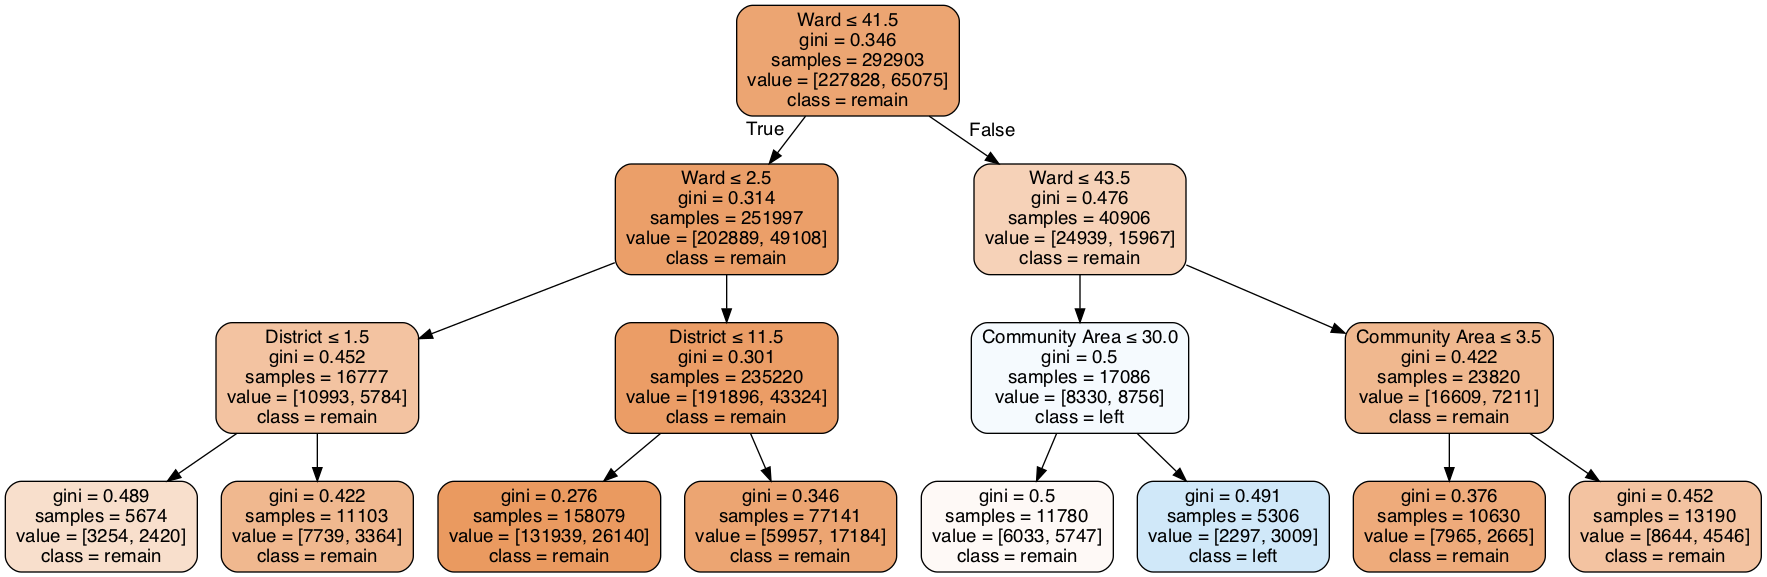

In [35]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/jephteestiverne/Desktop/Fall2020/ECON_622_01/decision_tree.png", width = 600, height = 300)

In [ ]:
# It is clear that random forest does a much better performance. Looking at our decision tree, we can also observe the importance of our variable of interests. 